Graphe original:


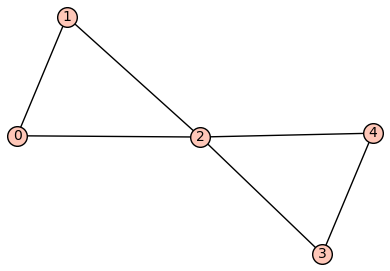

Composante biconnectée 1:


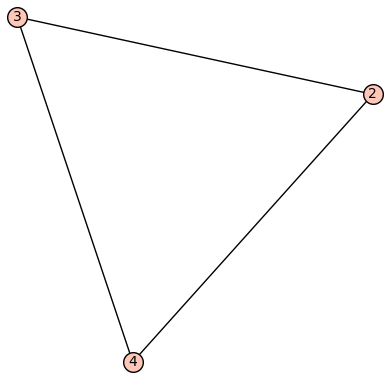

Composante biconnectée 2:


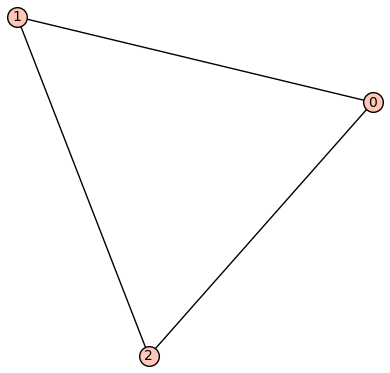

In [1]:
#Exercice 1

#(1) Calcule des composantes 2-connexes d’un graphe

from sage.graphs.graph import Graph

def schmidt_biconnected_components(graph):
    def dfs(u, disc, low, parent, chain_edges, chains):
        nonlocal time
        disc[u] = low[u] = time
        time += 1

        for v in graph.neighbors(u):
            if disc[v] == -1:  # Tree edge
                parent[v] = u
                chain_edges.append((u, v))
                dfs(v, disc, low, parent, chain_edges, chains)

                low[u] = min(low[u], low[v])

                if low[v] >= disc[u]:
                    # Extract the chain
                    chain = []
                    while chain_edges and chain_edges[-1] != (u, v):
                        chain.append(chain_edges.pop())
                    chain.append(chain_edges.pop())
                    chains.append(chain)
            elif v != parent[u] and disc[v] < disc[u]:  # Back edge
                low[u] = min(low[u], disc[v])
                chain_edges.append((u, v))

    n = graph.num_verts()
    disc = [-1] * n
    low = [-1] * n
    parent = [None] * n
    chain_edges = []
    chains = []
    time = 0

    for u in range(n):
        if disc[u] == -1:
            dfs(u, disc, low, parent, chain_edges, chains)

    # Convert chains to subgraphs
    biconnected_subgraphs = []
    for chain in chains:
        vertices = set(sum(chain, ()))
        biconnected_subgraphs.append(graph.subgraph(vertices=vertices))

    return biconnected_subgraphs

# Création du graphe
G = Graph()
G.add_edges([(0, 1), (1, 2), (2, 0), (2, 3), (3, 4), (4, 2)])

# Affichage du graphe original
print("Graphe original:")
G.show()

# Application de l'algorithme de Schmidt
biconnected_components = schmidt_biconnected_components(G)

# Affichage des sous-graphes biconnectés
for i, component in enumerate(biconnected_components):
    print(f"Composante biconnectée {i+1}:")
    component.show()

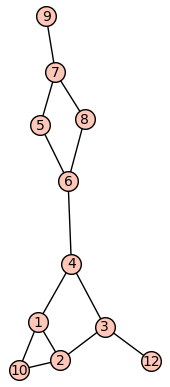

Composante 2-arêtes connexe 1 :


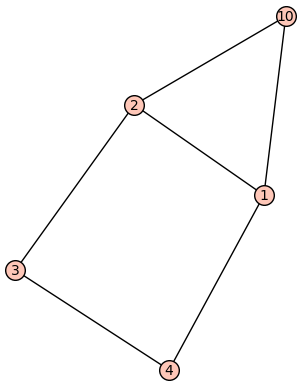

Composante 2-arêtes connexe 2 :


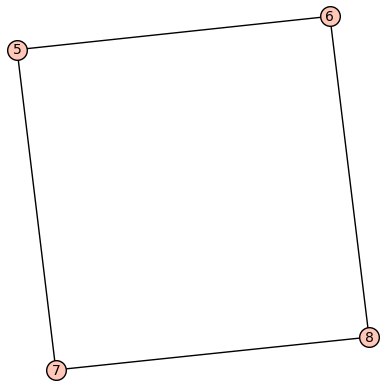

In [2]:
#(2) Calcule des composantes 2-arêtes connexes d’un graphe 

# Importer la bibliothèque SageMath
from sage.graphs.graph import Graph

edges = [
    (1, 2), (2, 3), (3, 4), (4, 1),  
    (5, 6), (6, 4),              
    (5, 7), (7, 8), (8, 6), (7, 9)  
]

# Création du graphe dans SageMath et ajout des arêtes
G = Graph()
G.add_edges(edges)

# Ajout des sommets pour former un triangle au carré '1234'
G.add_edges([(1, 10), (2, 10), (3, 12)])

# Affichage du graphe
G.show()

# Définir la fonction pour trouver les composantes 2-arêtes connexes
def schmidt_edge_biconnected_components(graph):
    def dfs(u, disc, low, parent, bridges):
        nonlocal time
        disc[u] = low[u] = time
        time += 1

        for v in graph.neighbors(u):
            if disc[v] == -1:
                parent[v] = u
                dfs(v, disc, low, parent, bridges)

                low[u] = min(low[u], low[v])

                if low[v] > disc[u]:
                    bridges.add((u, v))

            elif v != parent[u]:
                low[u] = min(low[u], disc[v])

    vertices = graph.vertices()
    disc = {v: -1 for v in vertices}
    low = {v: -1 for v in vertices}
    parent = {v: None for v in vertices}
    bridges = set()
    time = 0

    for u in vertices:
        if disc[u] == -1:
            dfs(u, disc, low, parent, bridges)

    # Diviser le graphe en composantes 2-arêtes connexes
    for u, v in bridges:
        graph.delete_edge(u, v)

    edge_biconnected_components = graph.connected_components_subgraphs()
    return edge_biconnected_components

# Testez votre code pour les composantes 2-arêtes connexes sur ce graphe
edge_biconnected_components = schmidt_edge_biconnected_components(G)

# Affichage des sous-graphes 2-arêtes connexes, en excluant les sommets isolés
for i, component in enumerate(edge_biconnected_components):
    if component.num_verts() > 1:  # Ne pas afficher les composantes avec un seul sommet
        print(f"Composante 2-arêtes connexe {i+1} :")
        component.show()

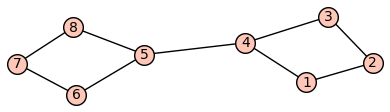

{(4, 5)}


In [6]:

# Exercice 2 :  trouvons  une arête déconnectante

from sage.graphs.graph import Graph

def find_bridges(graph):
    def dfs(u, visited, disc, low, parent, bridges):
        nonlocal time
        visited[u] = True
        disc[u] = low[u] = time
        time += 1

        for v in graph.neighbors(u):
            if not visited[v]:
                parent[v] = u
                dfs(v, visited, disc, low, parent, bridges)
                low[u] = min(low[u], low[v])

                if low[v] > disc[u]:
                    bridges.add((u, v))
            elif v != parent[u]:
                low[u] = min(low[u], disc[v])

    vertices = graph.vertices()
    visited = {v: False for v in vertices}
    disc = {v: float('inf') for v in vertices}
    low = {v: float('inf') for v in vertices}
    parent = {v: None for v in vertices}
    bridges = set()
    time = 0

    for u in vertices:
        if not visited[u]:
            dfs(u, visited, disc, low, parent, bridges)

    return bridges



# Création du graphe pour l'exemple

#Exemple 1

G = Graph([(1, 2), (2, 3), (3, 4), (4, 1),  # Premier carré
           (5, 6), (6, 7), (7, 8), (8, 5),  # Deuxième carré
           (4, 5)]) 


G.show()


# Exemple 2 ( à decommenter pour le tester)

'''
G = Graph([(1, 2), (2, 3), (3, 4), (4, 1),  
           (5, 6), (6, 7), (7, 8), (8, 5),  
           (9, 10), (10, 11), (11, 12), (12, 9),  
             
           (4, 5), (8, 9), (12, 10),(2,13) ])  

# Affichage du graphe
G.show()
'''



# Trouver les ponts dans le graphe
bridges = find_bridges(G)
print(bridges)